# **<center> Module 1.2 - Probabily & Statistic - Problems </center>** 
![Immune](https://i.imgur.com/0TSSaqL.png)  

# Problem

For the following dataset, make a descriptive statistical analysis of each of the variables of the following dataset, to do this:

- Calculate all the statistics you consider necessary.
- Create some visualizations to support your analysis (boxplot, pairplots, etc)
- If applicable, indicate the possible distribution of the variables.
- Examinate the correlation of the variables among them as well as with the output variable (Diagnosis)
- If applicable, propose some transformation that can be applied to some variable and that improves the correlation.

  ### Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


### Load data

In [ ]:
data = pd.read_csv('data.csv', sep=',')
#cambio el nombre de la columna vacia para poder eliminarla  
data.rename({"Unnamed: 32":"a"}, axis="columns", inplace=True)
#Elimino las columnas que no son necesarias
data.drop(['a','id'], axis=1, inplace=True)
#Remplaco las letras por valors para poder realizar un mejor analisis
data.replace(to_replace ="M", value = 1,  inplace = True)
data.replace(to_replace ="B", value = 0,  inplace = True)
data

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

In [ ]:
#Calculate all the statistics you consider necessary.
# Generate statistics
data.describe()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  569.000000   569.000000  ...      569.000000               569.000000
mean     0.372583    14.127292  ...        0.290076                 0.083946
std      0.483918     3.524049  ...        0.061867                 0.018061
min      0.000000     6.981000  ...        0.156500                 0.055040
25%      0.000000    11.700000  ...        0.250400                 0.071460
50%      0.000000    13.370000  ...        0.282200                 0.080040
75%      1.000000    15.780000  ...        0.317900                 0.092080
max      1.000000    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

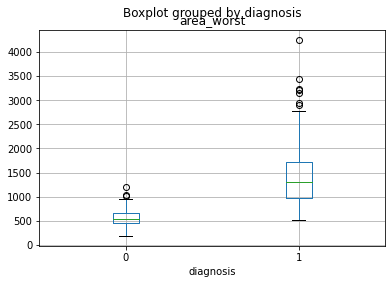

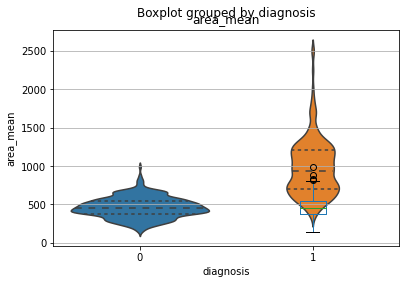

In [ ]:
#Create some visualizations to support your analysis (boxplot, pairplots, etc)
display(data.boxplot(by='diagnosis', column= 'area_worst') )
#Vemos que el area media de los resultados malignos es mayor que la de los resultados begnignos
#Vemos mas outliers para  los valores de peor area para los valores malignos, que para la media
#La media es mayor para los resultados malignos que para los begnignos
display(data.boxplot(by='diagnosis', column= 'area_mean'))
#En estos boxplot podemos ver claramente la distribucion de resultados positvos directamente afectados por el tamano
display(sb.violinplot(x='diagnosis', y='area_mean', data=data, inner="quartile", bw=0.2))

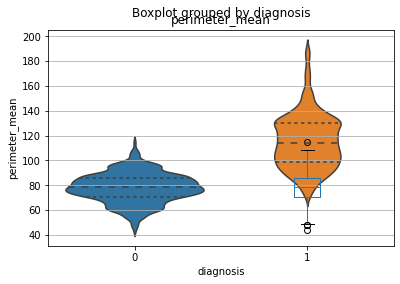

In [ ]:
#Create some visualizations to support your analysis (boxplot, pairplots, etc)
display(data.boxplot(by='diagnosis', column= 'perimeter_mean') )
#Vemos que el radio  de los resultados malignos es mayor que la de los resultados begnignos
#Vemos mas outliers que en el area para 
#La media es mayor para los resultados malignos que para los begnignos
#En estos boxplot podemos ver claramente la distribucion de resultados positvos directamente afectados por el tamano
display(sb.violinplot(x='diagnosis', y='perimeter_mean', data=data, inner="quartile", bw=0.2))

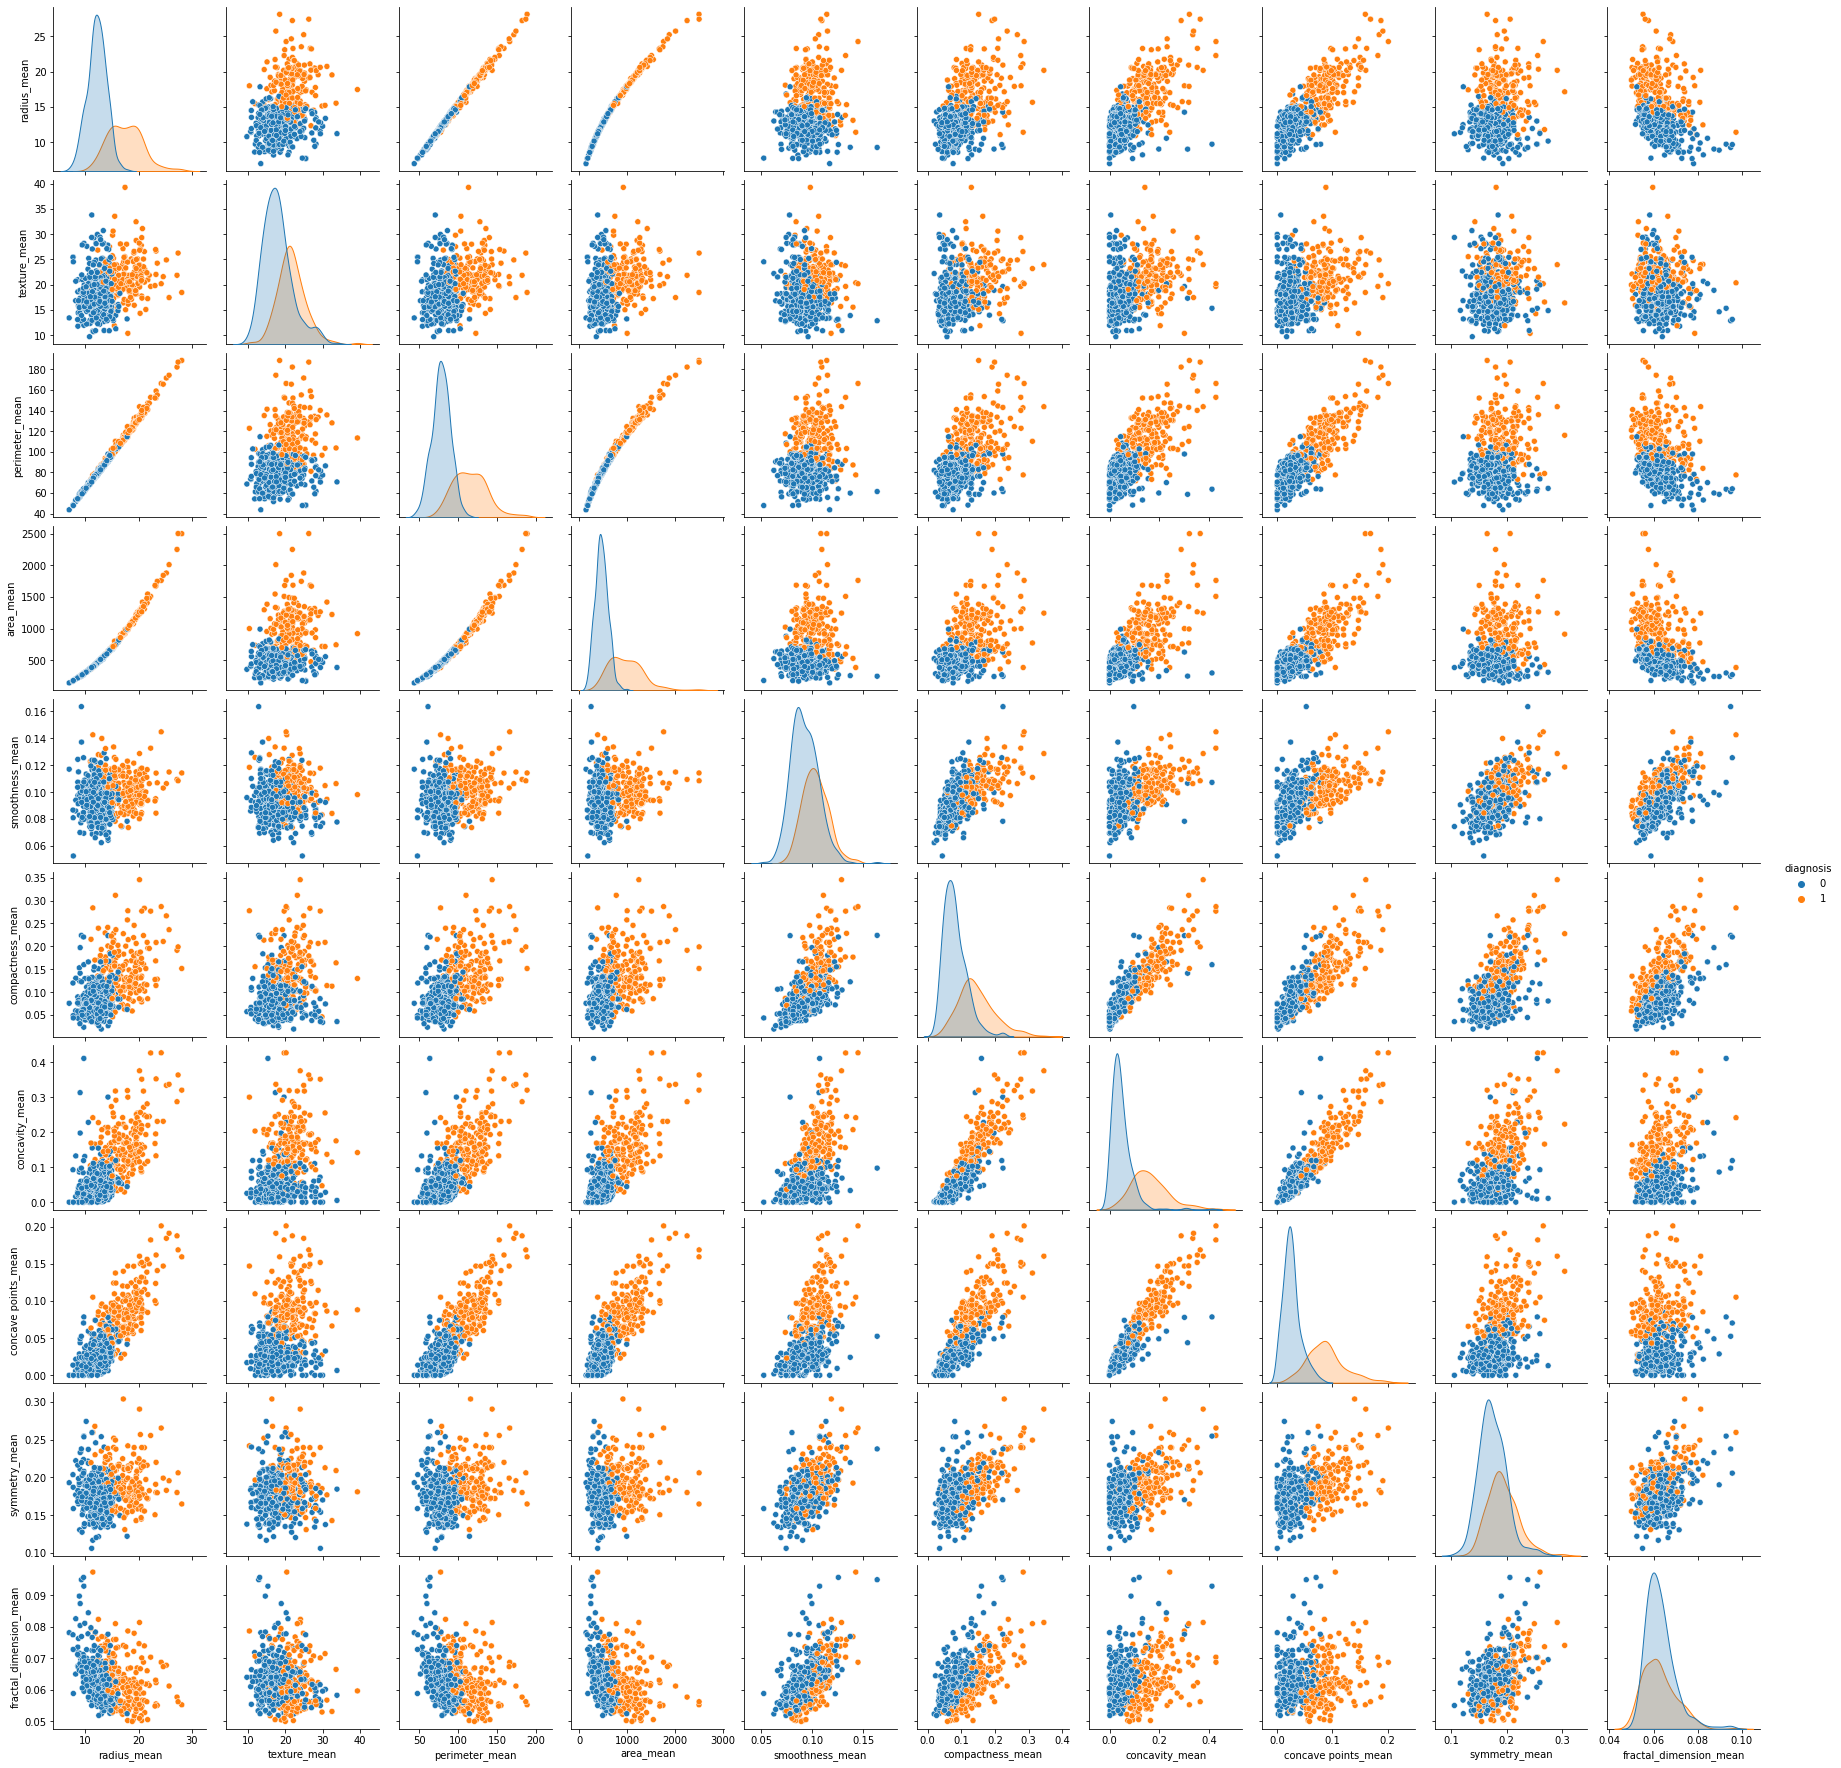

In [ ]:
#Create some visualizations to support your analysis (boxplot, pairplots, etc)
#Analisamos las relaciones entre las medias de los valores y los diagnosticos
#If applicable, indicate the possible distribution of the variables
#En algunas variable se ve claramente la relacion con los resultados de el diagnstico.
#Tambien vemos la distribucion de estos, donde usualmente resultados begnignos son de menor tamano 
#y menor concavidad
#Vemos la distribucion de valores tambien en la diagonal
df = data.iloc[:, 0:11]
sb.pairplot( df, hue ="diagnosis")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed59626908>,
      dtype=object)

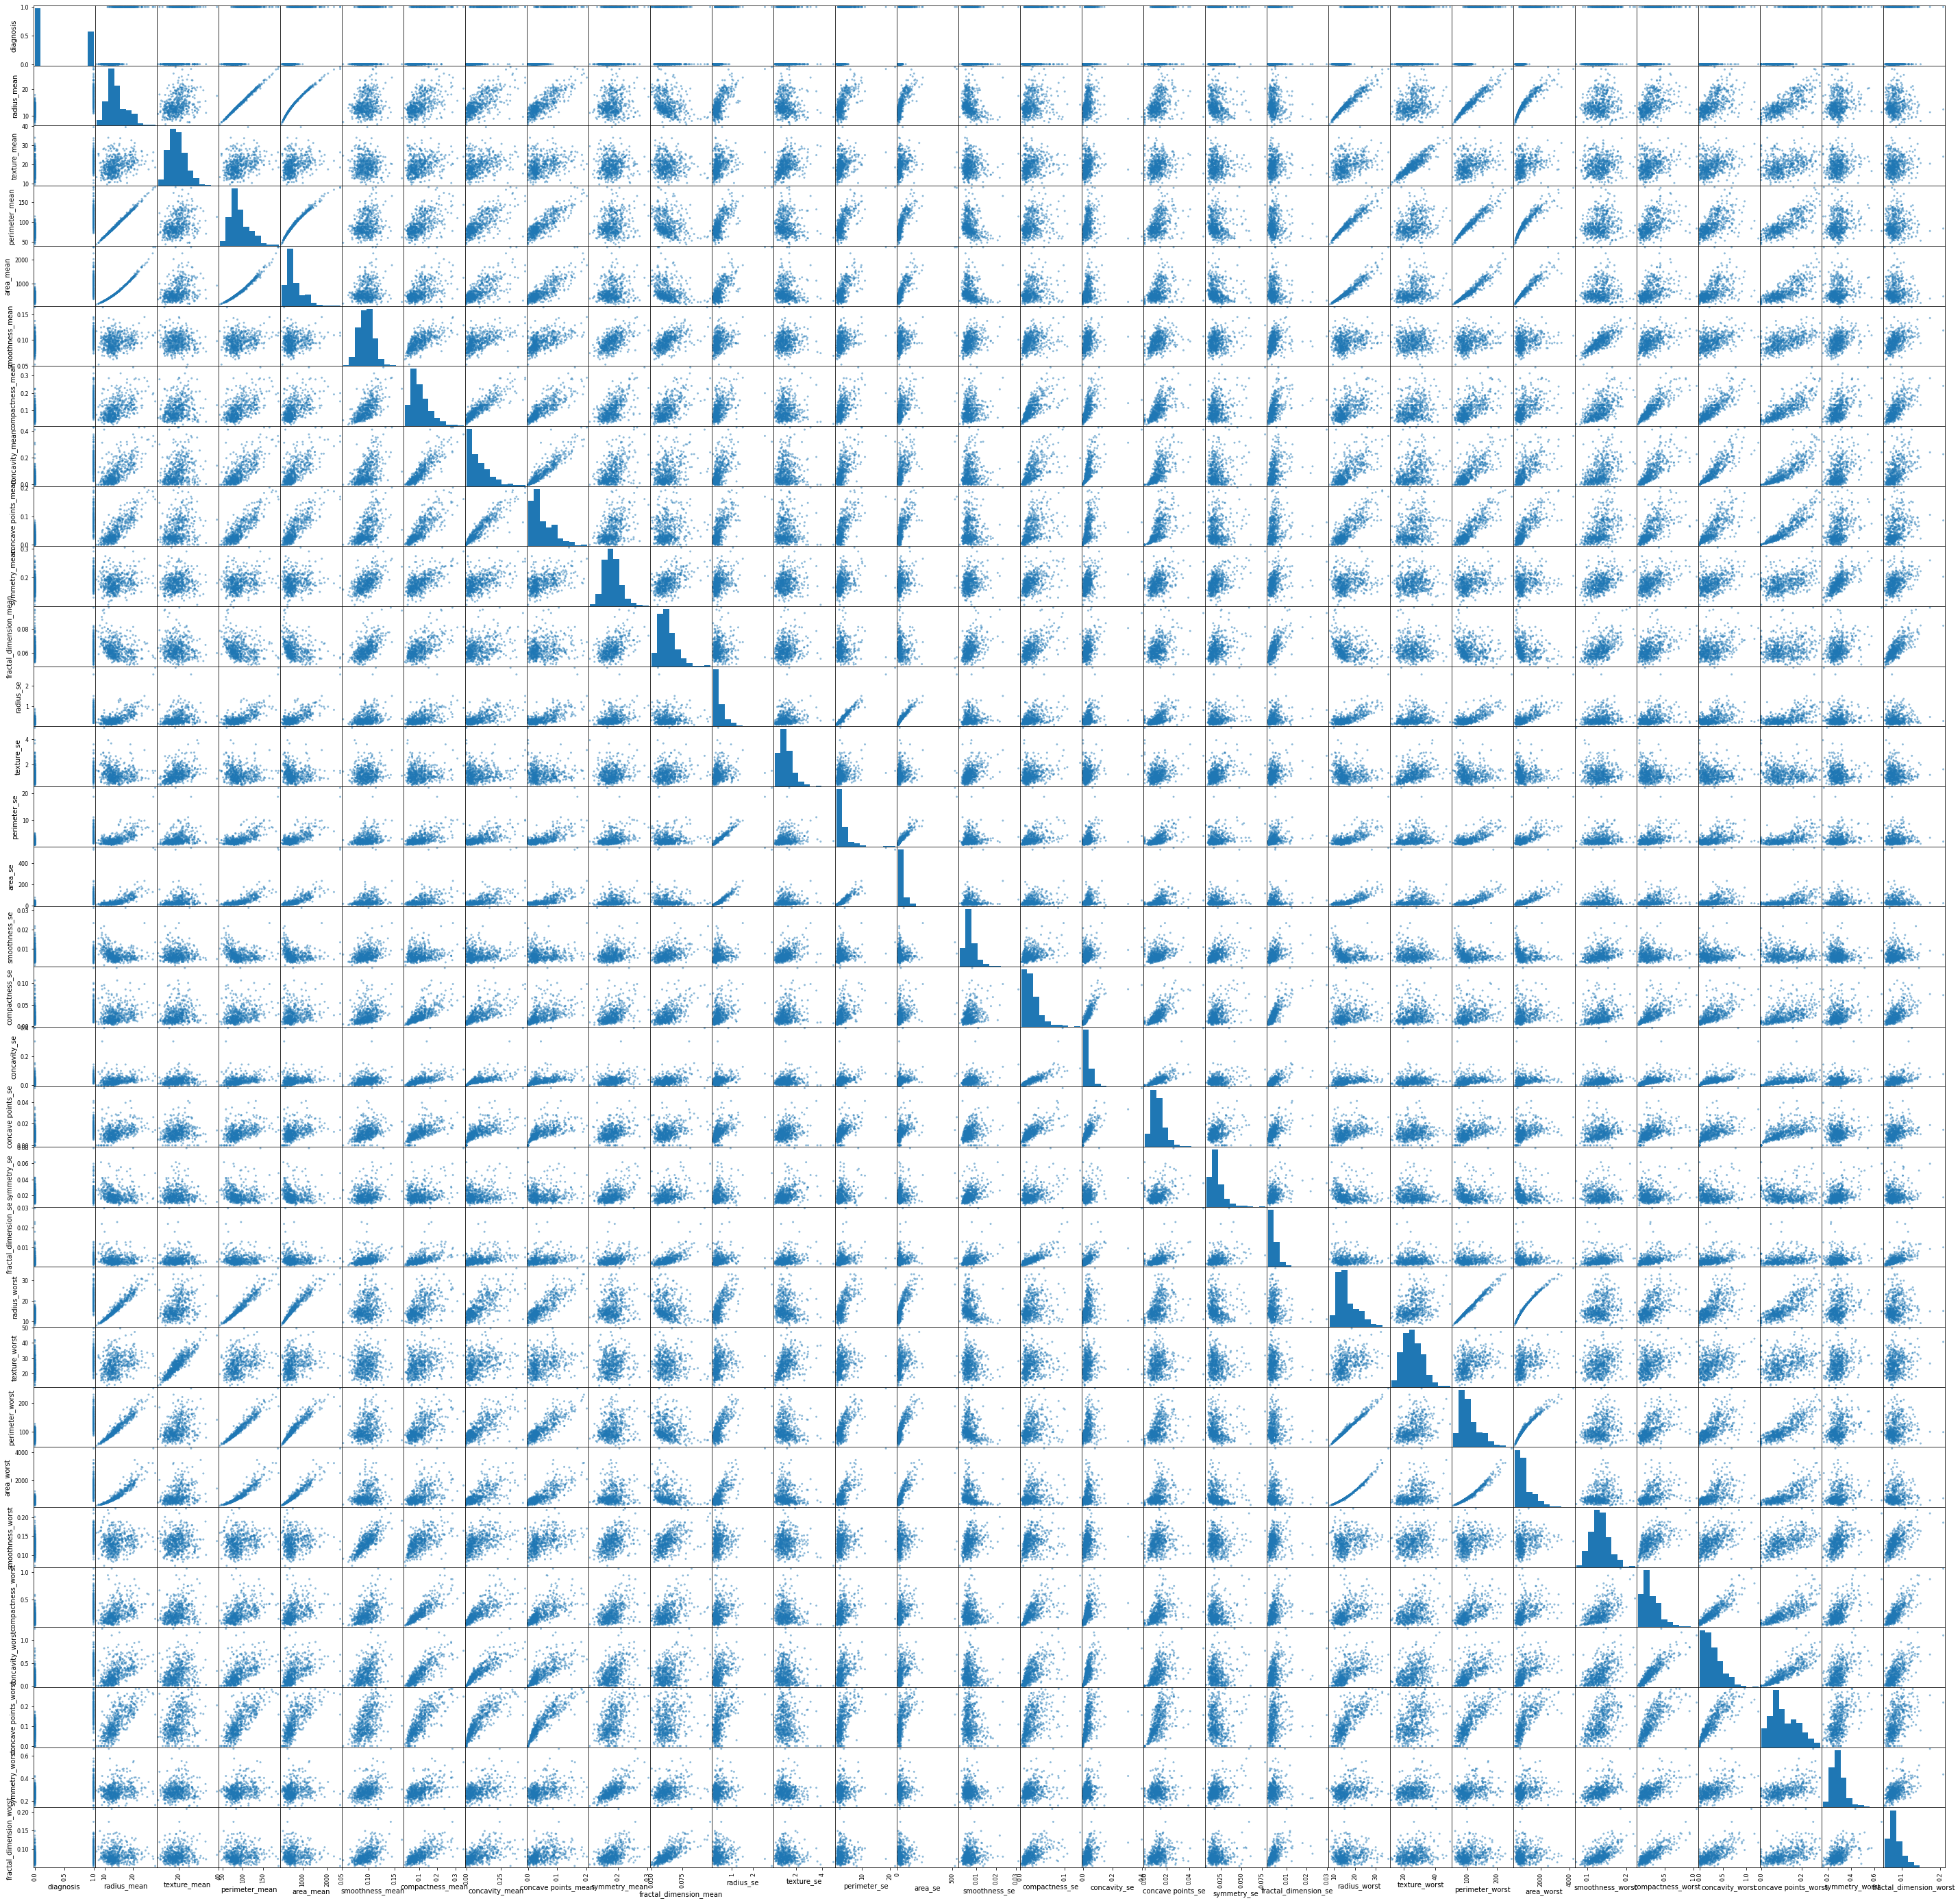

In [ ]:
#Podemos ver todas las correlaciones y en la diagonal el histograma de las variables con su distribucion
pd.plotting.scatter_matrix(data, figsize=(50,50))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed547e7048>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed53ab8588>]],
      dtype=object)

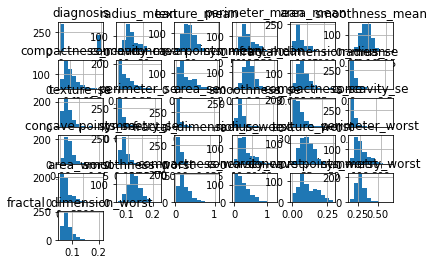

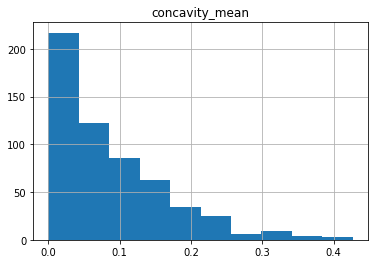

In [ ]:
#Para ver la distribucion podemos usar la funcion hist()
display(data.hist())
#Si queremos ver solo un avariable 
display(data.hist(column= 'concavity_mean' ))

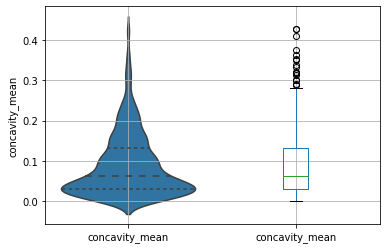

In [ ]:
#Para ver la distribucion podriamos tambien utilizar boxplot o diagramas de violin
display(sb.violinplot( y='concavity_mean', data=data, inner="quartile", bw=0.2))

data.boxplot( column= 'concavity_mean')

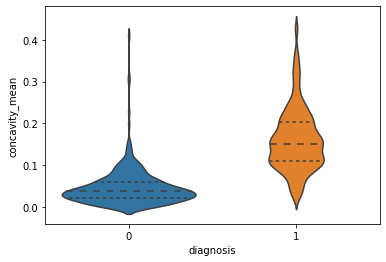

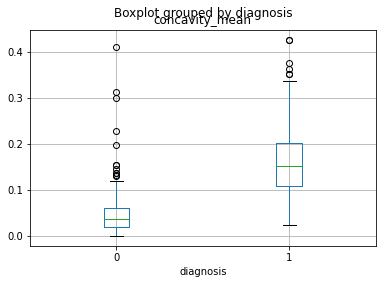

In [ ]:
#Para ver la distribucion podriamos tambien utilizar boxplot o diagramas de violin
# y podriamos evaluar la diferente distribucion dependiendo si el resultado es maligno o begnigno
display(sb.violinplot(x='diagnosis', y='concavity_mean', data=data, inner="quartile", bw=0.2))
data.boxplot(by='diagnosis', column= 'concavity_mean')


In [ ]:
#Examinate the correlation of the variables among them as well as with the output variable (Diagnosis)
#Podemos verificar la correlacion de forma numerica con diferentes metodos
# default method for corr is 'Pearson'
data.corr()
data.corr(method='kendall')
data.corr(method='spearman')

diagnosis  ...  fractal_dimension_worst
diagnosis                 1.000000  ...                 0.311477
radius_mean               0.732785  ...                 0.044564
texture_mean              0.461971  ...                 0.116144
perimeter_mean            0.748496  ...                 0.088961
area_mean                 0.734122  ...                 0.038758
smoothness_mean           0.371892  ...                 0.511457
compactness_mean          0.609288  ...                 0.688986
concavity_mean            0.733308  ...                 0.541838
concave points_mean       0.777877  ...                 0.421110
symmetry_mean             0.332567  ...                 0.410069
fractal_dimension_mean   -0.025903  ...                 0.760771
radius_se                 0.616912  ...                 0.111043
texture_se                0.019419  ...                -0.048143
perimeter_se              0.630411  ...                 0.185534
area_se                   0.714184  ...                 0.091670
smoothness_se            -0.052193  ...                 0.129752
compactness_se            0.380666  ...                 0.604844
concavity_se              0.470338  ...                 0.505962
concave points_se         0.488717  ...                 0.357090
symmetry_se              -0.092303  ...                 0.011133
fractal_dimension_se      0.201492  ...                 0.712771
radius_worst              0.787933  ...                 0.127449
texture_worst             0.476720  ...                 0.193191
perimeter_worst           0.796319  ...                 0.179003
area_worst                0.786902  ...                 0.118734
smoothness_worst          0.425513  ...                 0.614796
compactness_worst         0.606810  ...                 0.762247
concavity_worst           0.705734  ...                 0.623128
concave points_worst      0.781674  ...                 0.516664
symmetry_worst            0.396843  ...                 0.488439
fractal_dimension_worst   0.311477  ...                 1.000000

[31 rows x 31 columns]

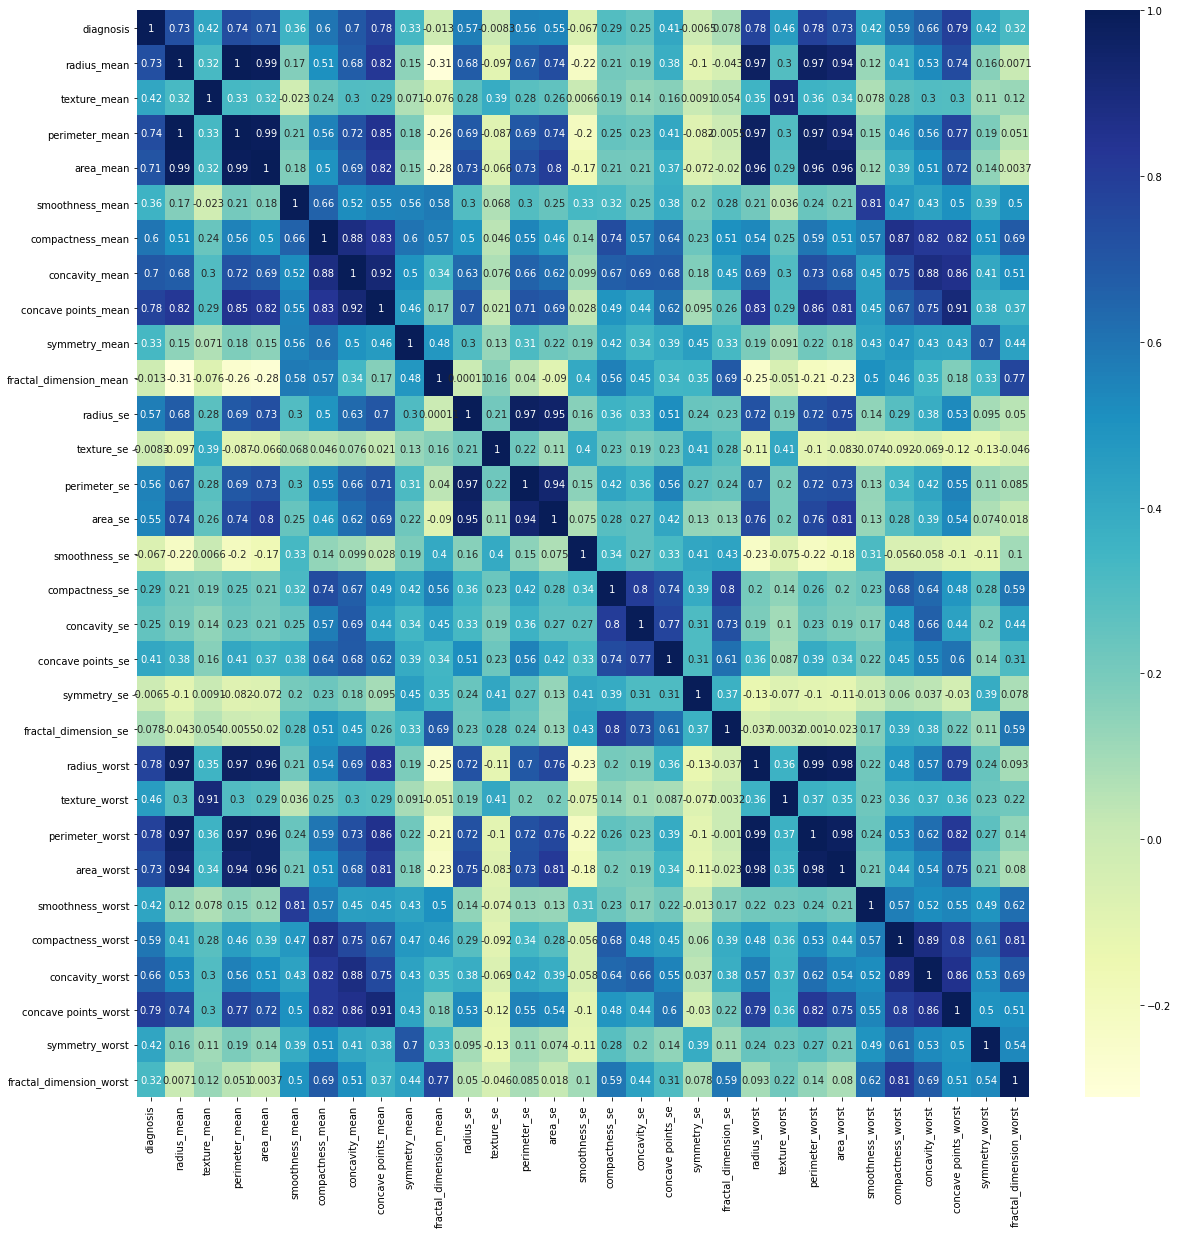

In [ ]:
#Examinate the correlation of the variables among them as well as with the output variable (Diagnosis)
#Variables en las que vemos una clara correlacion con el diagnostico:
#radio, perimetro, area,compacto,puntos de concavidad
#Una forma de vizualizar mejor la relacion entre ellas es con un heatmap
df_corr = data.corr()
plt.figure(figsize=(20,20))
sb.heatmap(df_corr, cmap="YlGnBu", annot=True)

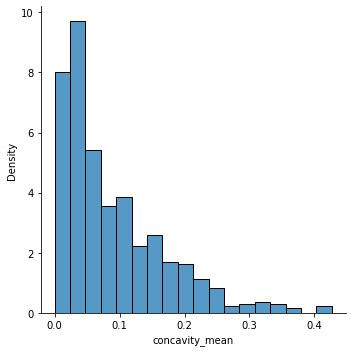

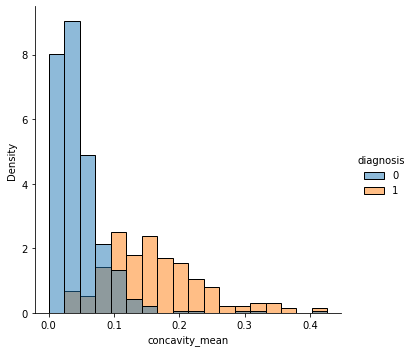

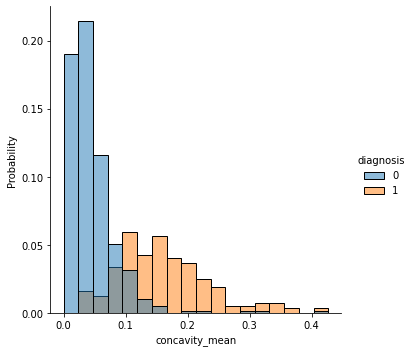

In [ ]:
#If applicable, propose some transformation that can be applied to some variable and that improves the correlation.
# Una forma seria analisar resutados distinguiendo entre malignos y begnignos 
 # Tambien Podemos normalizar las barras hasta 1.
#Si queremos ver solo un avariable 
sb.displot(data, x="concavity_mean", stat="density")
sb.displot(data, x="concavity_mean", hue="diagnosis", stat="density")
sb.displot(data, x="concavity_mean", hue="diagnosis", stat="probability")
